$$
\kappa_1 \in [0.5, 4]    \qquad    \kappa_2 \in [0, 2]
$$

$$
\mathcal{H} = -\frac{\partial^2}{\partial x^2}  +  \kappa_1 x^2  +  \kappa_2 x^4
$$

In [12]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.sparse import diags
import time

In [13]:
n = 2000


domain   = (-3, 3)
mesh, dx = np.linspace(domain[0], domain[1], n, retstep=True)
mesh     = np.resize(mesh, (n,))

x_matrix     = diags(mesh)

d2_of_x = diags([1, -2, 1], [-1, 0, 1], shape=(n, n))  / ( dx ** 2 )

In [14]:
kappa_1, kappa_2 = 4, 2

H = -d2_of_x + diags( kappa_1 * mesh ** 2  +  kappa_2 * mesh ** 4).toarray()

In [15]:
all_of_the_eigenvalues, all_of_the_eigenvectors = np.linalg.eig(H)

# this sorts the states into a coherent order
sort_index              = np.argsort(all_of_the_eigenvalues)#[::-1]
all_of_the_eigenvalues  =  all_of_the_eigenvalues[  sort_index]
all_of_the_eigenvectors = all_of_the_eigenvectors[:,sort_index]
all_of_the_eigenvectors = np.transpose(all_of_the_eigenvectors)


for i in np.arange(1):
    print("eigenvalue "+ str(i) +" = "+ str(all_of_the_eigenvalues[i]))

eigenvalue 0 = 2.2838002781082727


In [16]:
plotQ = True
# plotQ = False

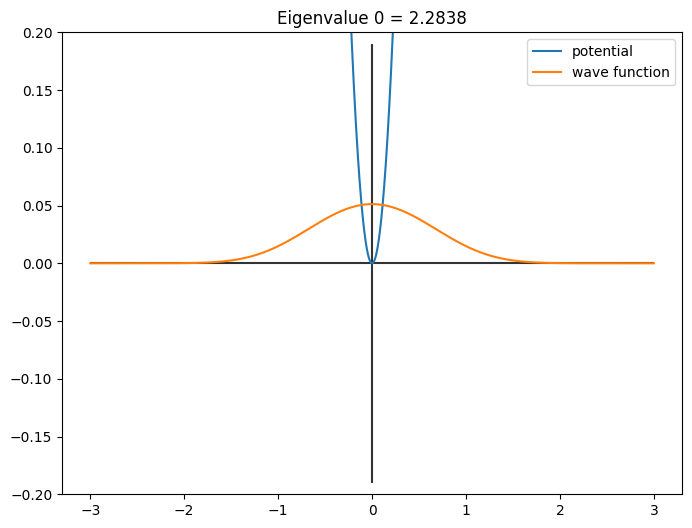

In [17]:
if plotQ:
    y_lim = 0.2
    for i in np.arange(1):
        if np.max(all_of_the_eigenvectors[i]) >= 0:
            coeff = 1
        else:
            coeff = -1

        plt.figure(figsize=(8, 6))
        plt.title("Eigenvalue "+ str(i) +" = "+ str( round(all_of_the_eigenvalues[i], 4)))
        plt.ylim(-0.2, 0.2)
        plt.hlines(0,        mesh[0],      mesh[-1], "k", alpha = 0.8)
        plt.vlines(0, -(y_lim - 0.01), y_lim - 0.01, "k", alpha = 0.8)
        plt.plot(mesh,          kappa_1 * mesh ** 2  +  kappa_2 * mesh ** 4, label = "potential")
        plt.plot(mesh,  coeff * np.resize(all_of_the_eigenvectors[i], (n,)), label = "wave function")
        plt.legend()
        plt.show()


---

In [18]:
dkappa       = 0.1
kappa_1_list = np.arange(0.5, 4 + dkappa, dkappa)
kappa_2_list = np.arange(0.0, 2 + dkappa, dkappa)

In [19]:
for i in np.arange(len( mesh )):
    mesh[i] = round(mesh[i], 8)

In [20]:
for i in np.arange(len( kappa_1_list )):
    kappa_1_list[i] = round(kappa_1_list[i], 8)
for i in np.arange(len( kappa_2_list )):
    kappa_2_list[i] = round(kappa_2_list[i], 8)

In [21]:
file = open("/Users/joshuamaldonado/Desktop/eigenvalues_for_n="+ str(n) +".csv", "w")

file.write("Josh's super well put together and super well formatted .csv file of eigenvalues and solve times for CAT plot")
file.write("\n")

file.write("x:")
file.write(",")
for x in mesh:
    file.write(str(x))
    if x != np.max(mesh):
        file.write(",")


file.write("\n")
file.write("\n")

file.write("dkappa = "+ str(dkappa))
file.write("\n")

file.write("kappa_1:")
file.write(",")
for kappa_1 in kappa_1_list:
    file.write(str(kappa_1))
    if kappa_1 != np.max(kappa_1_list):
        file.write(",")

file.write("\n")

file.write("kappa_2:")
file.write(",")
for kappa_2 in kappa_2_list:
    file.write("\t "+ str(kappa_2))
    if kappa_2 != np.max(kappa_2_list):
        file.write(",")

file.write("\n")
file.write("\n")
file.write("Trials:")
file.write("\n")

file.write("kappa_1")
file.write(",")
file.write("kappa_2")
file.write(",")
file.write("eigenvalue")
file.write(",")
file.write("solve time (s)")

file.write("\n")

# file.close()

1

In [22]:
for kappa_1 in kappa_1_list:
    for kappa_2 in kappa_2_list:
        print("kappa_1 = "+ str(kappa_1) +", kappa_2 = "+ str(kappa_2))

        t_1 = time.time()

        H = -d2_of_x + diags( kappa_1 * mesh ** 2  +  kappa_2 * mesh ** 4).toarray()
        all_of_the_eigenvalues, all_of_the_eigenvectors = np.linalg.eig(H)
        # all_of_the_eigenvalues = np.linalg.eigvals(H)
        ground_state_eigenvalue = np.sort(all_of_the_eigenvalues)[0]

        t_2 = time.time()

        print("eigenvalue = "+ str(ground_state_eigenvalue))
        print("    found in "+ str( round(t_2 - t_1, 4) ) +" s")

        
        file.write(
            str(kappa_1)
            +","+
            str(kappa_2)
            +","+
            str(ground_state_eigenvalue)
            +","+
            str( (t_2 - t_1) )
           )
        file.write("\n")

file.close()



kappa_1 = 0.5, kappa_2 = 0.0
eigenvalue = 0.713350087228585
    found in 6.4641 s
kappa_1 = 0.5, kappa_2 = 0.1
eigenvalue = 0.8184461552449127
    found in 6.02 s
kappa_1 = 0.5, kappa_2 = 0.2
eigenvalue = 0.8942885948196939
    found in 5.694 s
kappa_1 = 0.5, kappa_2 = 0.3
eigenvalue = 0.9555995804664303
    found in 5.3643 s
kappa_1 = 0.5, kappa_2 = 0.4
eigenvalue = 1.007994698912202
    found in 6.1835 s
kappa_1 = 0.5, kappa_2 = 0.5
eigenvalue = 1.054245150306663
    found in 6.282 s
kappa_1 = 0.5, kappa_2 = 0.6
eigenvalue = 1.0959446403626578
    found in 5.8876 s
kappa_1 = 0.5, kappa_2 = 0.7
eigenvalue = 1.1341057130967722
    found in 7.2229 s
kappa_1 = 0.5, kappa_2 = 0.8
eigenvalue = 1.1694178964456632
    found in 7.0875 s
kappa_1 = 0.5, kappa_2 = 0.9
eigenvalue = 1.2023752623772754
    found in 7.1103 s
kappa_1 = 0.5, kappa_2 = 1.0
eigenvalue = 1.233345868274574
    found in 5.1506 s
kappa_1 = 0.5, kappa_2 = 1.1
eigenvalue = 1.2626124208602187
    found in 5.32 s
kappa_1 = 0.5,